<h1 align="center">  Homework: 1 </h1>
<h2 align="center"> CS 5402 </h2>
<h3 align="center"> By: Md Yasin Kabir, email: mkdv6@mst.edu </h3>


<b>This notebook aim to find out the answers of the homework 1 of the Data Mining course. I have decided to use the jupyter notebook due to the ease of interaction and representation. </b>

# Reading data

In [1]:
#importing necessary packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#Reading data and combining training and test data
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')
combine = [train_df, test_df]
appended_df = train_df.append(test_df)

In [3]:
#Checking the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Subtask 1: Analyze by describing data

#### Q1: Which features are available in the dataset?

In [4]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

##### Q2: Which features are categorical?
Survived, Sex, Pclass and Embarked.

##### Q3: Which features are numerical?
Age, SibSp, Parch and Fare.

##### Q4: Which features are mixed data types?
Ticket and Cabin.


##### Q5: Which features contain blank, null or empty values?

In [5]:
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null 

From the above information we can see that, 
* In train: Age, Cabin and Embarked contain empty, null or empty values.
* In test: Age, Fare, and Cabin contain empty, null or empty values.

##### Q6: What are the data types (e.g., integer, floats or strings for various features?
The data types are:
* integers: PassengerID, Survived, Pclass, SibSp, Parch
* floats: Age, Fare
* String/Object: Name, Sex, Ticket, Cabin, Embarked

##### Q7: To understand what is the distribution of numerical feature values across the samples, please list the properties (count, mean, std, min, 25% percentile, 50% percentile, 75% percentile, max) of numerical features?

In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


##### Q8: To understand what is the distribution of categorical features, we define: count is the total number of categorical values per column; unique is the total number of unique categorical values per column; top is the most frequent categorical value; freq is the total number of the most frequent categorical value. Please the properties (count, unique, top, freq) of categorical features?

In [8]:
train_df.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Parr, Mr. William Henry Marsh",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [9]:
test_df.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Olsson, Mr. Oscar Wilhelm",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


## Subtask 2: Analyze by pivoting features

##### Q9: Can you observe significant correlation (>0.5) among Pclass=1 and Survived? If Pclas has significant correlation with Survivied, we should include this feature in the predictive model. Based on your computation, will you include this feature in the predictive model?

In [10]:
train_df[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


I can observe significant correlation (0.629630) among Pclass = 1 and Survived. Hence, I will include this feature in the predictive model. 

##### Q10: Are Women (Sex=female) were more likely to have survived?

In [11]:
train_df[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


Female has a correlation of 0.742038 with the Survived which refere they are more likely to survived than male. 

##### Q11: Let us start by understanding correlations between a numeric feature (Age) and our predictive goal (Survived). A histogram chart is useful for analyzing continuous numerical variables like Age where banding or ranges will help identify useful patterns. The histogram can indicate distribution of samples using automatically defined bins or equally ranged bands. This helps us answer questions relating to specific bands (e.g., infants, old). Please plot the histogram plots between ages and Survived (Figure 1 is an example), and answer the following questions:

([<matplotlib.axis.XTick at 0x254da7a7940>,
 <a list of 22 Text xticklabel objects>)

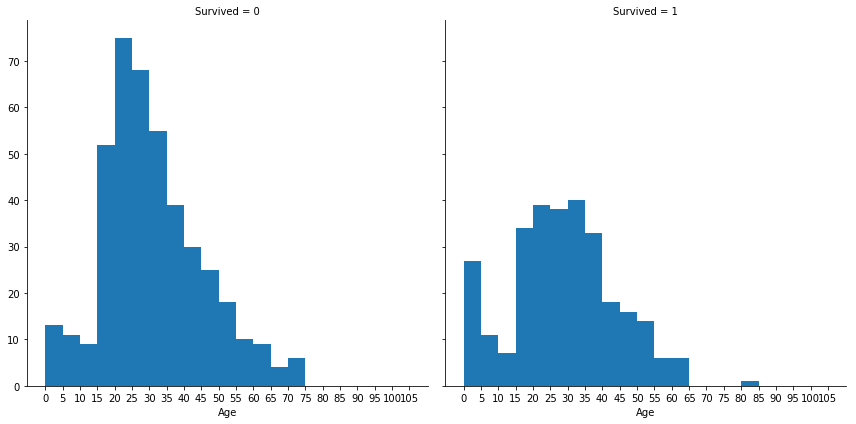

In [12]:
import seaborn as sns
histogram= sns.FacetGrid(train_df, col ='Survived', size=6)
histogram.map(plt.hist, 'Age', bins=range(0, 110, 5))
plt.xticks(range(0, 110, 5))

* <b>Do infants (Age <=4) have high survival rate?</b> : Yes
* <b>Do oldest passengers (Age = 80) survive?</b> : Yes the oldest passengers survived. 
* <b>Do large number of 15-25 year olds not survive?</b> : Unfortunately the fatality rate is high in 15-20. Most of them wasn't able to survive. 

Based on your analysis of the histograms,
* <b>Should we consider Age in our model training? (If yes, then we should complete the Age feature for null values.)</b> : Yes, we shoulod complete the Age feature for null values.
* <b>Should we should band age groups?</b> : Yes

##### Q12: We can combine three features (age, Pclass, and survivied) for identifying correlations using a single plot. This can be done with numerical and categorical features which have numeric values. Here is an example plot:

Please plot the histogram plot using python, and answer the following questions:
* <b>Does Pclass=3 have most passengers, however most did not survive?</b> : Yes. Although Pclass 3 have most passengers, most of them wasn't able to survive. 
* <b>Do infant passengers in Pclass=2 and Pclass=3 mostly survive?</b> : Yes. 
* <b>Do most passengers in Pclass=1 survive?</b> : Yes
* <b>Does Pclass vary in terms of Age distribution of passengers?</b>: Yes.
* <b>Should we consider Pclass for model training?</b> : Definitely.

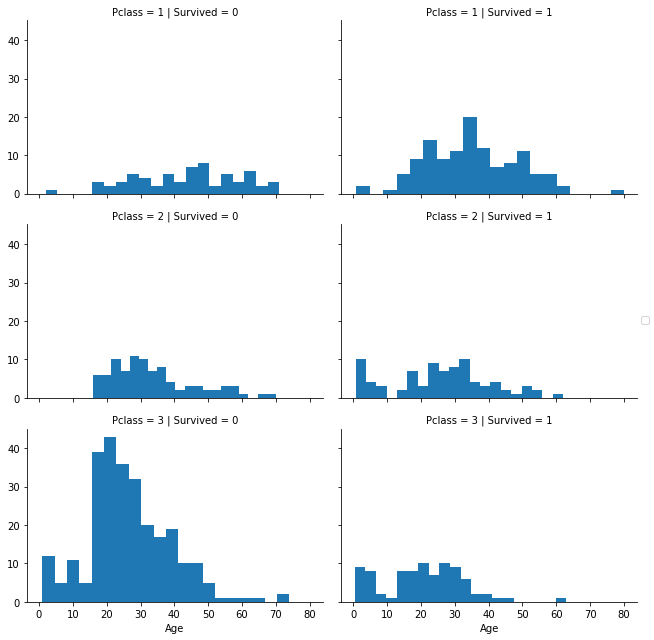

In [13]:
histograms = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=3, aspect=1.5)
histograms.map(plt.hist, 'Age', bins=20)
histograms.add_legend();

##### Q13: We want to correlate categorical features (with non-numeric values) and numeric features. We can consider correlating Embarked (Categorical non-numeric), Sex (Categorical non-numeric), Fare (Numeric continuous), with Survived (Categorical numeric). Please plot a histogram figure to illustrate the correlations of Embarked, Sex, Fare, and Survivied. Here is a sample plot:
And answer the following questions:
* <b>Do higher fare paying passengers have better survival?</b> : Yes.
* <b>Port of embarkation correlates with survival rates</b> : It's a little bit confusing. Although it seems Embarked C has higher survival rate. However if I consider the ratio between survived and not-survived it seems similar for S and C.
* <b>Should we consider banding fare feature?</b> : Yes, without a doubt. 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


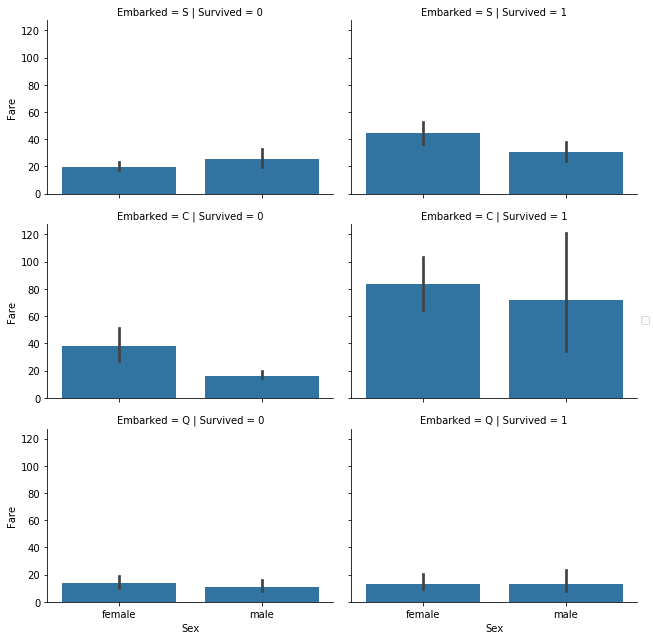

In [14]:
histograms = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=3, aspect=1.5)
histograms.map(sns.barplot, 'Sex', 'Fare')
histograms.add_legend()

##### Q14: What is the rate of duplicates for the Ticket feature? Is there a correlation between Ticket and survival? Should we drop the Ticket feature?


In [15]:
train_df['Ticket'].describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

In [16]:
rate_of_dup_ticket = ((891-681)/891)*100
print(rate_of_dup_ticket)

23.56902356902357


* 23% of the instances are duplicates in the Ticket feature. Also there is no correlation between Ticket and Survival. So we can drop Ticket feature.

##### Q15: Is the Cabin feature complete? How many null values there are in the Cabin features of the combined dataset of training and test dataset? Should we drop the Cabin feature?

In [17]:
appended_df.describe(include=["O"])

,Cabin,Embarked,Name,Sex,Ticket
count,295,1307,1309,1309,1309
unique,186,3,1307,2,929
top,C23 C25 C27,S,"Connolly, Miss. Kate",male,CA. 2343
freq,6,914,2,843,11


* The Cabin feature in not complete. Out of 1309 rows combining both train and test data only 295 rows contain Cabin feature. Among those 186 are unique. The number of null values are: 1014. We should drop the Cabin feature.

##### Q16: We can convert features which contain strings to numerical values. This is required by most model algorithms. Doing so will also help us in achieving the feature completing goal. In this question ,please convert Sex feature to a new feature called Gender where female=1 and male=0.

In [18]:
m = {'male' : 0, 'female' : 1}
for df in combine:
    df['Gender'] = df['Sex'].map(m).astype(int)

In [19]:
combine[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


##### Q17: We start estimating and completing features with missing or null values. We will first do this for the Age feature. We can consider three methods to complete a numerical continuous feature. A simple way is to generate random numbers between mean and standard deviation. More accurate way of guessing missing values is to use the K-Nearest Neighbor algorithm to select the top-K most similar data points, and then use the top-K most similar data points to impute the missing values of ages.

In [20]:
for df in combine:
    for i in range (0, len(df)):
        if np.isnan(df["Age"][i]) == True:
            df["Age"][i] = np.random.uniform(low=df['Age'].std(), high=df['Age'].median())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [21]:
combine[1].tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
413,1305,3,"Spector, Mr. Woolf",male,18.029440,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,15.147555,0,0,359309,8.0500,NaN,S,0
417,1309,3,"Peter, Master. Michael J",male,21.709698,1,1,2668,22.3583,NaN,C,0


##### Q18: Completing a categorical feature: Embarked feature takes S, Q, C values based on port of embarkation. Our training dataset has some missing values. Please simply fill these with the most common occurrences.

In [22]:
for df in combine:
    df['Embarked'] = df['Embarked'].fillna(train_df.Embarked.describe().top)

##### Q19: Completing and converting a numeric feature. Please complete the Fare feature for single missing value in test dataset using mode to get the value that occurs most frequently for this feature.

I tried to use mode. But mode wasn't working due to the value of 0.0

In [23]:
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].dropna().median())
combine[1]['Fare'] = combine[1]['Fare'].fillna(combine[1]['Fare'].dropna().median())

##### Q20: Convert the Fare feature to ordinal values based on the FareBand

In [24]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand']).mean()
val = train_df.FareBand.unique().get_values()
val.sort()
for df in combine:
    for i in range(len(val)):
        df.loc[(df['Fare'] > val[i].left) & (df['Fare'] <= val[i].right), 'Fare'] = i
    df['Fare'] = df['Fare'].astype(int)

In [25]:
combine[0].head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,0,NaN,S,0,"(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,3,C85,C,1,"(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,1,NaN,S,1,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,3,C123,S,1,"(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,1,NaN,S,0,"(7.91, 14.454]"
5,6,0,3,"Moran, Mr. James",male,24.777731,0,0,330877,1,NaN,Q,0,"(7.91, 14.454]"
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,3,E46,S,0,"(31.0, 512.329]"
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,2,NaN,S,0,"(14.454, 31.0]"
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,1,NaN,S,1,"(7.91, 14.454]"
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,2,NaN,C,1,"(14.454, 31.0]"
